# Deutsch Algorithm

# 1) Introduction

The Deutsch algorithm is idealized to be easy for a quantum computer with a oracle and hard for a classical deterministic computer. Therefore, it is not directly applicable to a defined problem and works more like a proof that Quantum Computers could be faster than a Classical Computer. 

This algorithm is later generalized for a function with more inputs, which is called the Deutsch-Josza Algorithm, which proves an exponential speedup relative to a classical deterministic computer, it is important to note that this doesn't prove an exponential speedup comparing to a Probabilistic Classical Computer. 

# 2) Stating the problem

**Problem**: Consider an oracle evaluating a 1 bit boolean function $f: \{ 0,1\} \rightarrow \{ 0,1\}$ we want to know if the function is constant ( $f(0) = 0$ and $f(1) = 1$) or balanced ( $f(0) = 1$ and $f(1) = 0$). 

For a classical computer it is needed two queries, that means, you need to test 2 diferent bits and see the outputs, for instance if $f(0) = 0$ and $f(1) = 1$ you know that the function is constant.

For a quantum computer this can be done with only one query. This is done with the Deutsch algorithm, the idea is to check if it is balanced, if it is not balanced it is constant.

# 3) Algorithm
The Deutsch's Algorithm is the following, we will consider the quantum circuit into two quantum registers, the work register(W) and the ancilla (A):

- 0) Start with the state $$\left| \psi \right> = \left| 1 \right>_A \left| 0 \right>_W $$

- 1) Apply a Hadamard on both qubits, the state will be: 

$$
\left| \psi_2 \right> =\frac{1}{2} \left( \left| 0 \right>_A - \left| 1 \right>_A \right) \otimes \left( \left| 0 \right>_W + \left| 1 \right>_W \right)
$$

- 2) Apply a Unitary operator, an oracle, such that:  

$$
U_f  \frac{1}{\sqrt 2} \left( \left| 0 \right>_A - \left| 1 \right>_A \right)\left| x \right>_W = (-1)^{f(x)} \frac{1}{\sqrt 2} \left( \left| 0 \right>_A - \left| 1 \right>_A \right)\left| x \right>_W
$$

The phase factor is "kicked back" on the front of the state, this will be useful to evaluate $f(x)$ with only one query. The state after $U_f$ is: 
 
$$
 \left| \psi_3 \right> = \frac{1}{2} \left( \left| 0 \right>_A - \left| 1 \right>_A \right) \otimes \left( (-1)^{f(0)}\left| 0 \right>_W   + (-1)^{f(1)}\left| 1 \right>_W \right) 
$$

- 3) Apply a Hadamard on the second qubit: 

$$
\left| \psi_3 \right> =\frac{1}{2} \left( \left| 0 \right>_A - \left| 1 \right>_A \right) \otimes \left[ \left((-1)^{f(0)} + (-1)^{f(1)}\right) \left| 0 \right>_W + \left((-1)^{f(0)} - (-1)^{f(1)}\right)\left| 1 \right>_W \right] 
$$

Now we have two cases:

 - If $f(0) = f(1)$ we will measure:
    $$
        \left| 0 \right>_W = \left| f(0) \oplus f(1) \right>_W
    $$
 - If $f(0) \neq f(1)$ we will measure:
    $$
    \left| 1 \right>_W = \left| f(0) \oplus f(1) \right>_W
    $$

In this implementation the oracle ($U_f$) is a C-NOT gate, this will measure if the function is balanced.

# 4) Implementation on Qiskit

We shall now implement this algorithm on Qiskit and run on a real Quantum Computer from IBMQ. 
For this it is needed to define the oracle $U_f$ exactly.

## 4.1) Constructing the Quantum Circuit

In [2]:
%matplotlib inline
import qiskit as qsk
import numpy as np
import matplotlib.pyplot as plt

In [14]:
qreg_w = qsk.QuantumRegister(1, name='w')
qreg_a = qsk.QuantumRegister(1, name='a')
qc = qsk.QuantumCircuit(qreg_w)
qc.add_register(qreg_a)

On Qiskit, all circuits are initialized on the state 00:

$$
\left| \psi_0 \right> = \left| 00 \right>
$$ 

Then we apply the X gate on the first register, in order to state be: 
$$
\left| \psi_1 \right> = \left| 10 \right>
$$

In [15]:
qc.x(qreg_a);

Since the Haddamard gate is given by the following matrix on the computational basis:

\begin{equation}
H = \frac{1}{\sqrt2}
 \begin{pmatrix} 
1 & 1\\
1 & -1 \\
\end{pmatrix}
\end{equation}

Now the state is 
$$
\left| \psi_2 \right> = \frac{1}{2} \left( \left| 0 \right> - \left| 1 \right> \right) \otimes \left( \left| 0 \right> + \left| 1 \right> \right) 
$$

In [16]:
qc.h(qreg_w);
qc.h(qreg_a);

Applying the CNOT, we have:
$$
\left| \psi_3 \right> =  \frac{1}{2} \left[ \left| 0 \right> \otimes \left( \left| 0 \oplus 0 \right> + \left| 1 \oplus 0 \right> \right) - \left| 1 \right> \otimes \left( \left| 0 \oplus 1 \right> + \left| 1 \oplus 1 \right> \right)
\right]
$$
$$
\left| \psi_3 \right> =  \frac{1}{2} \left[ \left| 0 \right> \otimes \left( \left| 0 \right> + \left| 1  \right> \right) 
- \left| 1 \right> \otimes \left( \left|  1 \right> + \left| 0 \right> \right) \right]
$$

In [17]:
qc.cx(qreg_w,qreg_a);

After the Hadamard on the work qubit, we have that:

$$
\left| \psi_4 \right> = \frac{1}{2} \left[ \left( \left| 0 \right> + \left| 1 \right> \right) \otimes \left( \left| 0 \right> + \left| 1  \right> \right) - \left( \left| 0 \right> - \left| 1 \right> \right) \otimes \left( \left|  1 \right> + \left| 0 \right> \right)
\right]
$$

$$
\left| \psi_4 \right> =  \frac{1}{\sqrt2} 
\left( 
\left| 0 \right> - \left| 1 \right>
\right) \otimes
\left| 1 \right>
$$

In [18]:
qc.h(qreg_w);

## 4.2) Measuring the circuit

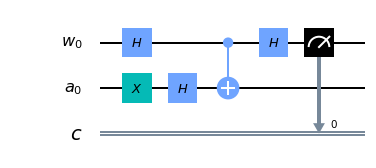

In [19]:
creg = qsk.ClassicalRegister(1, name='c')
qc.add_register(creg)
qc.measure(qreg_w,creg)
qc.draw(output='mpl')

## 4.3) Running Experiments

### 4.3.1) Using qasm_simulator

In [12]:
backend_sim = qsk.Aer.get_backend('qasm_simulator')
job_sim = qsk.execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)

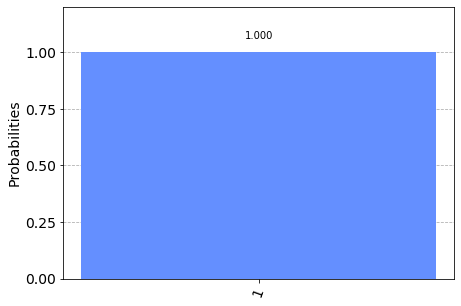

In [13]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### 4.3.1) Running on IBMQ

We will choose the least busy backend with at least 2 qubits:

In [20]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

provider = IBMQ.load_account();
num_qubits = 2

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= num_qubits and not x.configuration().simulator and x.status().operational==True))
backend


<IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>

Submiting the job for the IBM Q platform

In [21]:
from qiskit.tools.monitor import job_monitor

job_exp = qsk.execute(qc, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


In [22]:
result_exp = job_exp.result()

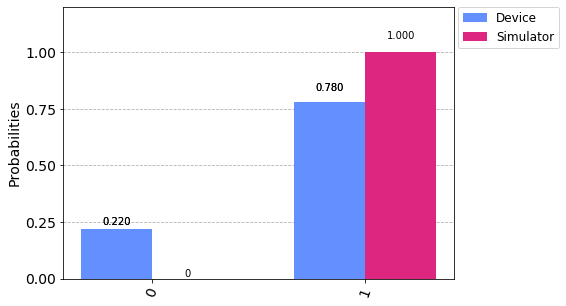

In [24]:
from qiskit.visualization import plot_histogram
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

This shows that the real quantum computer has error associated with it, for this algorithm we still have the majority of states on the 1 state. This error can be mitigated by some methods, that I will show in the future.

---------------------------------------------------------------------------------

In [25]:
import qiskit.tools.jupyter
%qiskit_version_table